# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
# Import the relevant Python libararies and modules.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Users/a2046/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load the dataset into a DataFrame.
df = pd.read_csv("../data/customer_booking.csv", encoding="ISO-8859-1")
# Display the first 5 rows of the data.
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
# Display a concise summary of the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

In [4]:
# Check for duplicates in the data.
df.drop_duplicates().shape

(49281, 14)

In [5]:
df.shape

(50000, 14)

In [6]:
# Remove duplicates
df = df.drop_duplicates()

In [7]:
# Display the total number of bookings from each sales channel
df['sales_channel'].value_counts()

Internet    43917
Mobile       5364
Name: sales_channel, dtype: int64

In [8]:
sc1 = 43917
sc2 = 5364
print(str(round(sc1/(sc1+sc2), 4)*100)+'%')

89.12%


In [9]:
# Display the total number of bookings of different trip types.
df['trip_type'].value_counts()

RoundTrip     48779
OneWay          386
CircleTrip      116
Name: trip_type, dtype: int64

In [10]:
tt1 = 48779
tt2 = 386
tt3 = 116
print(str(round(tt1/(tt1+tt2+tt3), 4)*100)+'%')

98.98%


Before we compute any statistics on the data, lets do any necessary data conversion.

In [11]:
# Convert categorical data to numerical data.
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [12]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [13]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [14]:
# Display a summary of descriptive statistics of the data.
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000
mean,1.590187,84.723281,23.053976,9.070676,3.813620,0.668229,0.295631,0.426635,7.279974,0.149977
std,1.016538,90.410229,33.832149,5.413099,1.991913,0.470854,0.456331,0.494593,1.496390,0.357052
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

Create a new feature `is_weekend` to analyze the effect of the flight day being on weekends. If the flight day is Saturday or Sunday, `is_weekend = 1`, otherwise, `is_weekend = 0`.

In [15]:
# Use the values in the `flight_day` column to create a new `is_weekend` column.

# Define a function to apply to column `flight_day`.
def assign_value(x):
    if x in [6, 7]:
        return 1
    else:
        return 0

# Apply the function to create column `is_weekend`.
df["is_weekend"] = df["flight_day"].apply(assign_value)


In [16]:
# Check the results.
df[["flight_day", "is_weekend"]].head(10)

,flight_day,is_weekend
0,6,1
1,6,1
2,3,0
3,6,1
4,3,0
5,4,0
6,4,0
7,1,0
8,1,0
9,7,1


Observe the number of passengers on each day of the week, weekday or weekend.

In [17]:
# Total number of passengers on each day of the week.
df_num_perday = df.groupby('flight_day')['num_passengers'].sum().reset_index()
df_num_perday.head(10)

,flight_day,num_passengers
0,1,12750
1,2,11873
2,3,11915
3,4,11548
4,5,10409
5,6,9240
6,7,10631


In [18]:
# Total number of passengers on weekday or weekends. 
df_num_weekend = df.groupby('is_weekend')['num_passengers'].sum().reset_index()
print(df_num_weekend.head())
# The ratio of the total number of passengers on weekdays over weekends.
ratio = df_num_weekend[df_num_weekend.is_weekend == 0].num_passengers.item() / df_num_weekend[df_num_weekend.is_weekend == 1].num_passengers.item()
print(ratio)

   is_weekend  num_passengers
0           0           58495
1           1           19871
2.9437371043228824


In [19]:
# The ratio of the total number of passengers on weekdays per day over weekends.
avg_weekday = 0.2 * df_num_weekend[df_num_weekend.is_weekend == 0].num_passengers.item() 
avg_weekend = 0.5 * df_num_weekend[df_num_weekend.is_weekend == 1].num_passengers.item()
ratio_avg = avg_weekday / avg_weekend
print(ratio_avg)

1.177494841729153


From above, we can see that Saturday has the least number of passengers and the total number of passengers on weekdays is 3 times of the total number of passengers on weekends. On average, one day during weekdays has slightly more passengers than one day during weekends. 

To get more insight, let's take a look at the average number of passengers per day. 

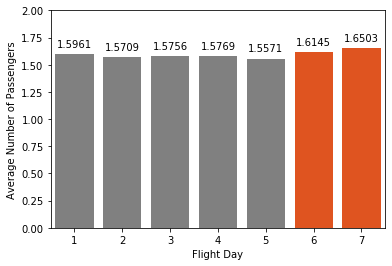

In [20]:
# Average number of passengers on each day of the week.
df_avg_num = df.groupby('flight_day')['num_passengers'].mean().reset_index()
#df_avg_num.head(10)

# Create bar plot to visualize the average number of passengers.

color = ['#808080', '#808080', '#808080', '#808080', '#808080', '#FF4500', '#FF4500']
ax = sns.barplot(data=df_avg_num, \
                 x = 'flight_day', y = 'num_passengers', \
                 palette=color)

# Label the y-values on top of the bars
for p in ax.patches:
    ax.annotate(f'{round(p.get_height(), 4)}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')

# Set labels for the x and y axes
plt.xlabel("Flight Day")
plt.ylabel("Average Number of Passengers")
plt.ylim(0,2)
# Show the plot
plt.show()


The bar plot indicates that the average numbers of passengers per day of the weekends are greater than the weekdays. 

Let's check the number of flights on each day of the week.

In [21]:
# The number of flights on each day of the week from Monday to Sunday. 
df['flight_day'].value_counts().reset_index().sort_values(by='index')

,index,flight_day
0,1,7988
2,2,7558
1,3,7562
3,4,7323
4,5,6685
6,6,5723
5,7,6442


The table above shows that there are indeed less flights on weekends. 

Let's find out the routes that have the most passengers on weekends.

In [22]:
# Total number of passengers on weekends for each route.
df_route = df[df['is_weekend'] == 1].groupby('route').agg({'num_passengers' : 'sum'}).reset_index().sort_values(by='num_passengers', ascending=False)

# Display the top five routes.
df_route.head()


,route,num_passengers
4,AKLKUL,1244
243,DMKKIX,445
606,PENTPE,396
375,ICNSIN,308
538,MELSGN,297


In [23]:
print(df.shape)

(49281, 15)


Visualize the countries where the bookings were made.

In [24]:
# Create a world map with country names and total number of bookings of each country.

# Create a DataFrame with country names and their value counts
df_map = df["booking_origin"].value_counts().rename_axis("Country").reset_index(name="Bookings")
df_map


,Country,Bookings
0,Australia,17691
1,Malaysia,7055
2,South Korea,4502
3,Japan,3819
4,China,3284
...,...,...
99,Panama,1
100,Tonga,1
101,Tanzania,1
102,Bulgaria,1


In [25]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install geopandas

In [26]:
# Merge the geospatial data and the customer bookings data
# (The geospatial data is downloaded from https://www.naturalearthdata.com/, cultural vectors)
import geopandas as gpd
world = gpd.read_file('Countries/ne_110m_admin_0_countries.shp')
merged_data = world.merge(df_map, left_on="NAME", right_on="Country")

/Users/a2046/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/Users/a2046/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


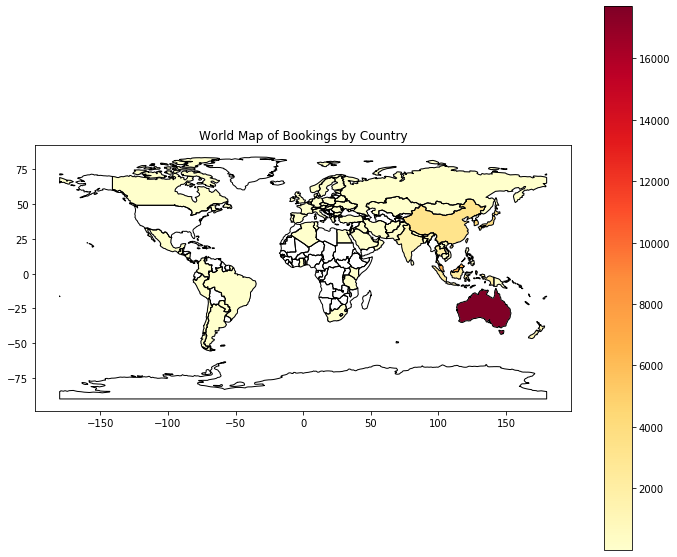

In [27]:
# Create the world map
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the world map
world.boundary.plot(ax=ax, linewidth=1, color='k')

# Plot the countries with color based on the number of bookings
merged_data.plot(column='Bookings', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set plot title
plt.title('World Map of Bookings by Country')

# Show the map
plt.show()

Summary and recommendation:

- There are 49281 unique customer bookings represented in this dataset.
- Near 90% bookings are from the internet instead of mobile phones.
- Near 99% bookings are round trips. 
- The world map plot shows that Australia has significantly more bookings than other countries. The countries where the bookings were made are located in various continents of the world. 
- Country names in `booking_origin` can be grouped into continent in the following analyzation.
- The bar plot shows that the average number of passengers per day of the weekend is greater than the weekday, although the total number of passengers per day of the weekend is less than the weekday.
- The number of flights on weekends is less than weekdays.
- The five routes that have the most passengers on weekends are `AKLKUL`, `DMKKIX`, `PENTPE`, `ICNSIN`, `MELSGN`.
- British Airways can increase the number of flights to the top five routes on weekends to boost customer bookings. 

### Constructing machine learning models

In [28]:
# Important imports for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from scipy import stats

#### Data preparation

In [29]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0


The data has been structured, organized and cleaned in Task 1 and the EDA shown above. Now let's take a closer look and prepare the data for machine learning models.

Check the data type of each column. Expect numerical data as inputs of the tree-based models.

In [30]:
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
is_weekend                 int64
dtype: object

Check for missing values

In [31]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
is_weekend               0
dtype: int64

In [32]:
df.shape

(49281, 15)

Drop the categorical columns that have too many unique values.  

`route`

In [33]:
# Number of unique values in `route` column
df['route'].value_counts()

AKLKUL    2620
PENTPE     912
MELSGN     833
ICNSIN     793
DMKKIX     729
          ... 
AKLHGH       1
JEDPDG       1
JEDPEN       1
DACPEK       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

In [34]:
# Drop the `route` column
df.drop('route', axis=1, inplace=True)
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend
0,2,Internet,RoundTrip,262,19,7,6,New Zealand,1,0,0,5.52,0,1
1,1,Internet,RoundTrip,112,20,3,6,New Zealand,0,0,0,5.52,0,1
2,2,Internet,RoundTrip,243,22,17,3,India,1,1,0,5.52,0,0
3,1,Internet,RoundTrip,96,31,4,6,New Zealand,0,0,1,5.52,0,1
4,2,Internet,RoundTrip,68,22,15,3,India,1,0,1,5.52,0,0


In [35]:
# Number of unique values in `booking_origin` column
df['booking_origin'].value_counts()

Australia               17691
Malaysia                 7055
South Korea              4502
Japan                    3819
China                    3284
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

`booking_origin`

In [36]:
# Change the contry names to continent.

# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pycountry_convert

In [37]:
import pycountry_convert as pc

# Define a function to get the continent for a given country
def get_continent(country_name):
    try:
        country_code = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        return continent_code
    except KeyError:
        return 'Others'


# Replace "Myanmar (Burma)" with "Myanmar"
df['booking_origin'] = df['booking_origin'].replace('Myanmar (Burma)', 'Myanmar')

# Use the get_continent function to map countries to continents
df['booking_continent'] = df['booking_origin'].apply(get_continent)

# If you need to handle the special case of invalid countries, you can replace 'Others' for them
# df['booking_continent'] = df['booking_continent'].replace('Others', 'Invalid Country')

df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend,booking_continent
0,2,Internet,RoundTrip,262,19,7,6,New Zealand,1,0,0,5.52,0,1,OC
1,1,Internet,RoundTrip,112,20,3,6,New Zealand,0,0,0,5.52,0,1,OC
2,2,Internet,RoundTrip,243,22,17,3,India,1,1,0,5.52,0,0,AS
3,1,Internet,RoundTrip,96,31,4,6,New Zealand,0,0,1,5.52,0,1,OC
4,2,Internet,RoundTrip,68,22,15,3,India,1,0,1,5.52,0,0,AS


In [38]:
# Number of unique values in `booking_continent` column
df['booking_continent'].value_counts()

AS        29233
OC        18765
EU          571
NA          522
Others       81
AF           68
SA           41
Name: booking_continent, dtype: int64

In [39]:
# Drop the `booking_origin` column
df.drop('booking_origin', axis=1, inplace=True)
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend,booking_continent
0,2,Internet,RoundTrip,262,19,7,6,1,0,0,5.52,0,1,OC
1,1,Internet,RoundTrip,112,20,3,6,0,0,0,5.52,0,1,OC
2,2,Internet,RoundTrip,243,22,17,3,1,1,0,5.52,0,0,AS
3,1,Internet,RoundTrip,96,31,4,6,0,0,1,5.52,0,1,OC
4,2,Internet,RoundTrip,68,22,15,3,1,0,1,5.52,0,0,AS


Check and remove outliers.

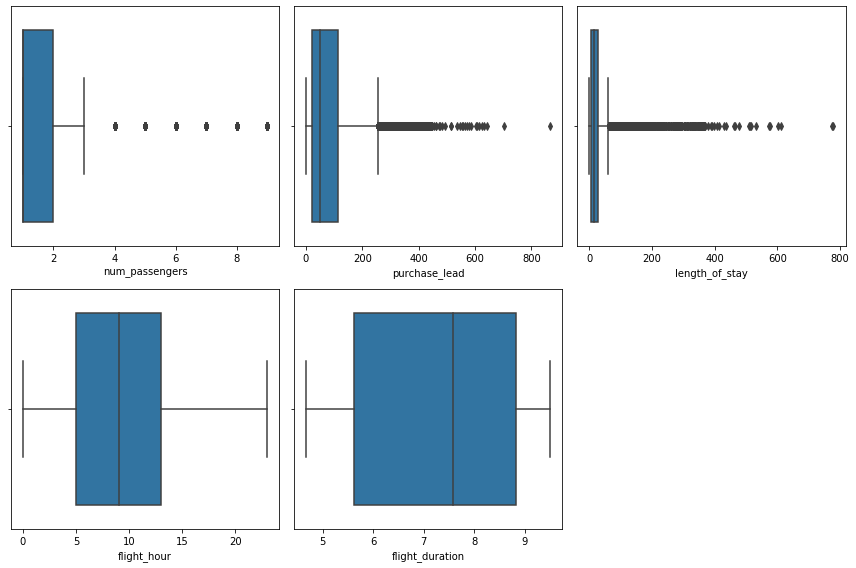

In [40]:
# Check outliers for the numerical data
col = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
plt.figure(figsize=(12,8))

for i, column in enumerate (df[col].columns, 1):
    plt.subplot(2,3,i)
    sns.boxplot(data=df[col], x=df[column])
    plt.tight_layout()


From the box plot, outliers are observed in `purchaes_lead` and `length_of_stay`.

In [41]:
# Remove outliers using Z-score
# Copy the result into a new DataFrame
filtered_entries = np.array([True] * len(df))

print(f'Shape of the original DataFrame: {df.shape}') 

for i in col:
    zscore = abs(stats.zscore(df[i]))
    filtered_entries = (zscore < 3) & filtered_entries
    df_ml = df[filtered_entries]
       
print(f'Shape of the filtered DataFrame : {df_ml.shape}')

Shape of the original DataFrame: (49281, 14)
Shape of the filtered DataFrame : (46477, 14)


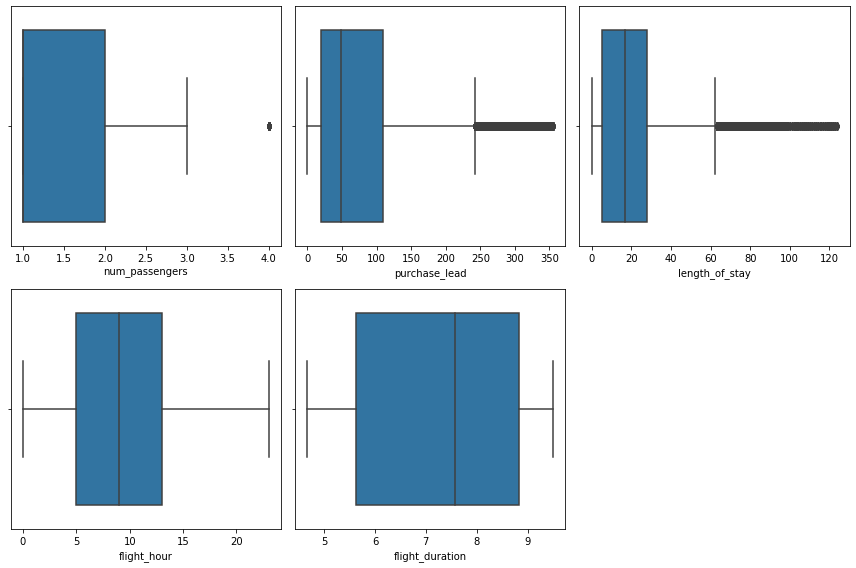

In [42]:
# Check the results
plt.figure(figsize=(12,8))
for i, column in enumerate (df_ml[col].columns, 1):
    plt.subplot(2,3,i)
    sns.boxplot(data=df_ml[col], x=df_ml[column])
    plt.tight_layout()

Normalization

In [43]:
# Find the maximum and minimum values using .loc[]
max_val = df_ml.loc[:, col].max()
min_val = df_ml.loc[:, col].min()

# Normalize the column using .loc[] and update it in the DataFrame
df_ml.loc[:, col] = (df_ml.loc[:, col] - min_val) / (max_val - min_val)

df_ml.head()

/Users/a2046/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend,booking_continent
0,0.333333,Internet,RoundTrip,0.738028,0.153226,0.304348,6,1,0,0,0.175983,0,1,OC
1,0.000000,Internet,RoundTrip,0.315493,0.161290,0.130435,6,0,0,0,0.175983,0,1,OC
2,0.333333,Internet,RoundTrip,0.684507,0.177419,0.739130,3,1,1,0,0.175983,0,0,AS
3,0.000000,Internet,RoundTrip,0.270423,0.250000,0.173913,6,0,0,1,0.175983,0,1,OC
4,0.333333,Internet,RoundTrip,0.191549,0.177419,0.652174,3,1,0,1,0.175983,0,0,AS


Data encoding

Convert categorical data in `sales_channel`,  `trip_type` and `booking_continent` to numerical values.

`sales_channel`

In [44]:
# Label encoding 
# "Internet": 0, "Mobile": 1
from sklearn import preprocessing
df['sales_channel'] = preprocessing.LabelEncoder().fit_transform(df['sales_channel'])

# Or
# df['sales_channel'] = df['sales_channel'].map({"Internet": 0, "Mobile": 1})


`trip_type`

In [45]:
df['trip_type'] = df['trip_type'].map({"RoundTrip": 0, "OneWay": 1, "CircleTrip": 2}) 


`booking_continent`

In [46]:
# One-hot encoding
df = pd.get_dummies(df, drop_first = True)

In [47]:
df.dtypes

num_passengers                int64
sales_channel                 int64
trip_type                     int64
purchase_lead                 int64
length_of_stay                int64
flight_hour                   int64
flight_day                    int64
wants_extra_baggage           int64
wants_preferred_seat          int64
wants_in_flight_meals         int64
flight_duration             float64
booking_complete              int64
is_weekend                    int64
booking_continent_AS          uint8
booking_continent_EU          uint8
booking_continent_NA          uint8
booking_continent_OC          uint8
booking_continent_Others      uint8
booking_continent_SA          uint8
dtype: object

Create the training and testing data

In [48]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['booking_complete'], axis=1)
y = df['booking_complete']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
y_train.value_counts(normalize=True)

0    0.850041
1    0.149959
Name: booking_complete, dtype: float64

The dataset is imbalanced.

Resampling for the imbalanced dataset.

In [50]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install imbalanced-learn

In [51]:
# Oversampling

## Trouble shooting: ImportError fixed by restarting the Jupyter Notebook.
from imblearn.over_sampling import SMOTE

# Create a SMOTE object
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit and transform the dataset to perform oversampling
X_resampled, y_resampled = smote.fit_resample(X_train, y_train.ravel())

#### Model building

Decision tree

In [52]:
%%time
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
dt_pred1 = decision_tree.predict(X_test)

CPU times: user 124 ms, sys: 5.23 ms, total: 129 ms
Wall time: 131 ms


In [53]:
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred1))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred1))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred1))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred1))

Decision Tree
Accuracy: 0.766257
Precision: 0.249240
Recall: 0.277214
F1 Score: 0.262484


Decision trees can be particularly susceptible to overfitting. Combining hyperparameter tuning and grid search can help ensure this doesn't happen. For instance, setting an appropriate value for max depth could potentially help reduce a decision tree's overfitting problem by limiting how deep a tree can grow.

Random forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
%%time
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
dt_pred2 = random_forest.predict(X_test)

CPU times: user 3.44 s, sys: 59.5 ms, total: 3.5 s
Wall time: 3.51 s


In [56]:
print("Random Forest")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred2))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred2))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred2))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred2))

Random Forest
Accuracy: 0.845592
Precision: 0.389744
Recall: 0.051386
F1 Score: 0.090800


In [57]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install xgboost

In [58]:
import xgboost as xgb

In [59]:
%%time
xg_boost = xgb.XGBClassifier(random_state=42)
xg_boost.fit(X_train, y_train)
dt_pred3 = xg_boost.predict(X_test)

CPU times: user 13.4 s, sys: 715 ms, total: 14.1 s
Wall time: 1.01 s


In [60]:
print("XGBoost")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred3))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred3))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred3))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred3))

XGBoost
Accuracy: 0.847215
Precision: 0.398496
Recall: 0.035835
F1 Score: 0.065757


XGBoost are known for its superior predictive performance with a variety of hyperparameters. It also handles imbalanced data well. Further steps will continue with XGBoost classifier model. Additional steps, such as hyperparameter tunning, can help reduce overfitting and improve the performance. 

Produce a confusion matrix.

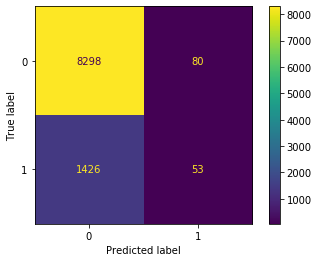

In [61]:
dt_pred = dt_pred3

cm = metrics.confusion_matrix(y_test, dt_pred, labels = xg_boost.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = xg_boost.classes_)
disp.plot()

In [62]:
print(metrics.classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      8378
           1       0.40      0.04      0.07      1479

    accuracy                           0.85      9857
   macro avg       0.63      0.51      0.49      9857
weighted avg       0.79      0.85      0.79      9857



In [64]:
%%time

# Train the model with oversampled data
xg_boost.fit(X_resampled, y_resampled)
dt_pred4 = xg_boost.predict(X_test)

CPU times: user 20.4 s, sys: 427 ms, total: 20.8 s
Wall time: 1.37 s


In [65]:
print("XGBoost")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred4))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred4))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred4))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred4))
print(metrics.classification_report(y_test, dt_pred4))

XGBoost
Accuracy: 0.817592
Precision: 0.294723
Recall: 0.154834
F1 Score: 0.203014
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      8378
           1       0.29      0.15      0.20      1479

    accuracy                           0.82      9857
   macro avg       0.58      0.54      0.55      9857
weighted avg       0.78      0.82      0.79      9857



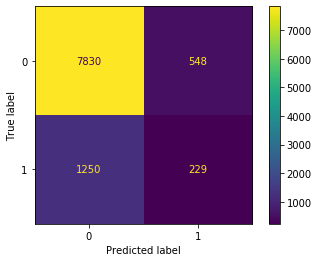

In [66]:
cm = metrics.confusion_matrix(y_test, dt_pred4, labels = xg_boost.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = xg_boost.classes_)
disp.plot()

Hyperparameter tunning

In [67]:
# Define parameters
cv_params = {'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
             'min_child_weight': [5, 10],
             'learning_rate': [0.3],
             'subsample': [0.7]    
}
# Define how the models will be evaluated
scoring = {'accuracy', 'precision', 'recall', 'f1'}


Increasing the number of hyperparameters will initially improve the performance of the model. But it will also considerably increase the time spent during the GridSearch process, and there will be diminishing returns as the number of hyperparameters continues to increase.
Here we choose some of the key hyperparameters for training the model quickly. More hyperparameters may be later considered.

Construct the GridSearch cross-validation

In [68]:
xgb_cv = GridSearchCV(xg_boost,
                      cv_params,
                      scoring = scoring,
                      cv = 5,
                      refit = 'f1'
                     )

In [69]:
%%time
xgb_cv = xgb_cv.fit(X_train, y_train)


CPU times: user 1h 18min 3s, sys: 2min 26s, total: 1h 20min 30s
Wall time: 5min 20s


In [70]:
xgb_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=20, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [71]:
xgb_cv.best_params_

{'learning_rate': 0.3,
 'max_depth': 20,
 'min_child_weight': 5,
 'subsample': 0.7}

In [72]:
print("Best Avg. Validation Score: ", "%.4f" % xgb_cv.best_score_)

Best Avg. Validation Score:  0.1888


In [73]:
dt_pred_cv1 = xgb_cv.predict(X_test)

In [74]:
print("XGBoost Cross-Validation")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred_cv1))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred_cv1))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred_cv1))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred_cv1))
print(metrics.classification_report(y_test, dt_pred_cv1))

XGBoost Cross-Validation
Accuracy: 0.828345
Precision: 0.340807
Recall: 0.154158
F1 Score: 0.212291
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      8378
           1       0.34      0.15      0.21      1479

    accuracy                           0.83      9857
   macro avg       0.60      0.55      0.56      9857
weighted avg       0.79      0.83      0.80      9857



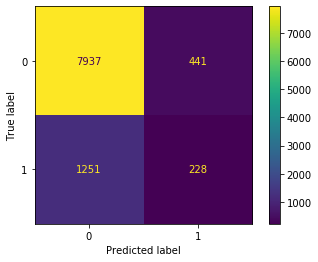

In [75]:
cm_cv = metrics.confusion_matrix(y_test, dt_pred_cv1, labels = xgb_cv.classes_)
disp_cv = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_cv, display_labels = xgb_cv.classes_)
disp_cv.plot()


In [76]:
%%time

# With oversampled data
xgb_cv.fit(X_resampled, y_resampled)
dt_pred_cv2 = xgb_cv.predict(X_test)

CPU times: user 3h 9min 45s, sys: 7min 40s, total: 3h 17min 26s
Wall time: 13min 27s


Oversampling increased the trainning time more significantly with the hyperprameter tunning. 

In [77]:
print("XGBoost Cross-Validation")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred_cv2))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred_cv2))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred_cv2))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred_cv2))
print(metrics.classification_report(y_test, dt_pred_cv2))

XGBoost Cross-Validation
Accuracy: 0.808968
Precision: 0.292181
Recall: 0.192022
F1 Score: 0.231742
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      8378
           1       0.29      0.19      0.23      1479

    accuracy                           0.81      9857
   macro avg       0.58      0.55      0.56      9857
weighted avg       0.78      0.81      0.79      9857



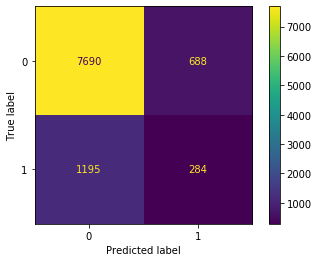

In [78]:
cm_cv = metrics.confusion_matrix(y_test, dt_pred_cv2, labels = xgb_cv.classes_)
disp_cv = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_cv, display_labels = xgb_cv.classes_)
disp_cv.plot()

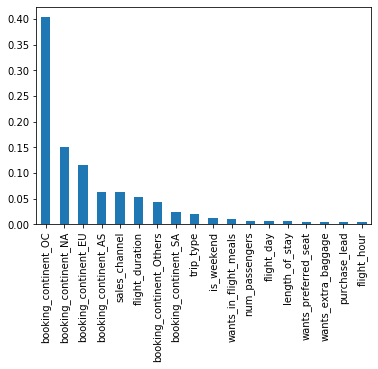

In [79]:
importances = xg_boost.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)


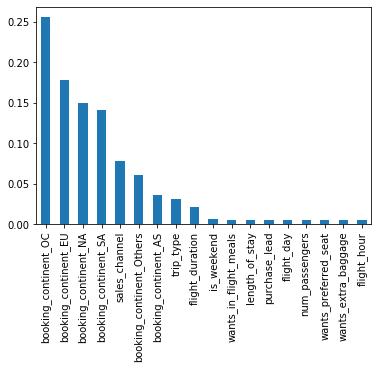

In [80]:
importances = xgb_cv.best_estimator_.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)


`feature_importances_` offers a technical perspective based on how frequently features are used in the model's structure. For example, `booking_continent_OC` is rated as the most important feature here because it appears in the dataset for the most times. 

In [81]:
from xgboost import plot_importance

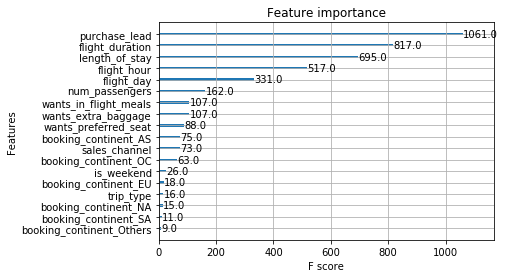

In [83]:
plot_importance(xg_boost)

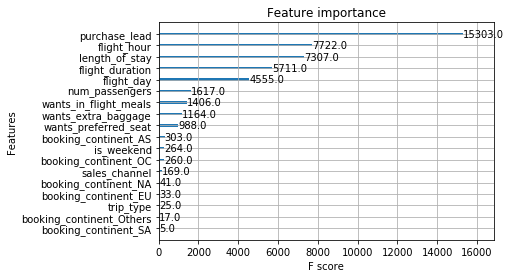

In [84]:
plot_importance(xgb_cv.best_estimator_)

`plot_importance()` aims to provide a more intuitive and meaningful representation of feature importance by emphasizing the effect of features on model performance. Therefore, it is prefered for this practical task of feature selection.

Text(0.5, 0, 'Relateve Importance')

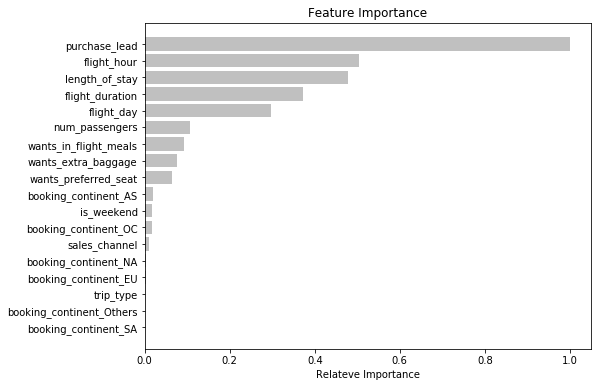

In [85]:
# Adjust the format and normalize the x values

# To access the F-scores and corresponding features
f_score_dict = xgb_cv.best_estimator_.get_booster().get_fscore()

# Sort the F-scores in descending order
sorted_f_scores = sorted(f_score_dict.items(), key=lambda x: x[1], reverse=True)

# Extract the feature names and their F-scores
feature_names = [feature for feature, score in sorted_f_scores]
f_scores = [score for feature, score in sorted_f_scores]

# The F-scores and corresponding features in sorted order
#print("Feature Names:", feature_names)
#print("F-Scores:", f_scores)

# Normalized scores
f_scores /= np.max(f_scores)
#print("F-Scores:", f_scores)

fig, ax = plt.subplots(figsize=(8,6))
ax.barh(feature_names[::-1], f_scores[::-1], color='silver') 
plt.title("Feature Importance")
plt.xlabel("Relateve Importance")